### CS9170B Reinforcement Learning ###
#### Assignment 1- Part 1 ####
Kevin Alamanda | kalamand@uwo.ca

In [110]:
# import required libraries

import numpy as np
from tabulate import tabulate #for generating table

In [111]:
# defining the problem
transitions = {
    'Poor_Unknown': { #state 1
        'save': [('Poor_Unknown', 1, 0)],
        'advertise': [('Poor_Famous', 0.5, 0), ('Poor_Unknown', 0.5, 0)]
    },
    'Poor_Famous': {  #state 2
        'save': [('Rich_Famous', 0.5, 10), ('Poor_Unknown', 0.5, 0)],
        'advertise': [('Poor_Famous', 1, 0)]
    },
    'Rich_Unknown': { #state 3
        'save': [('Poor_Unknown', 0.5, 0), ('Rich_Unknown', 0.5, 10)],
        'advertise': [('Poor_Unknown', 0.5, 0), ('Poor_Famous', 0.5, 0)]
    },
    'Rich_Famous': {  #state 4
        'save': [('Rich_Unknown', 0.5, 10), ('Rich_Famous', 0.5, 10)],
        'advertise': [('Poor_Famous', 1, 0)]
    }
}

In [112]:
# creating a Markov Decision Process class to keep a track of the states, actions and transitions
class MDP:
    def __init__(self, transitions):
        self.states = list(transitions.keys())
        self.actions = list(transitions[self.states[0]].keys())
        self.transitions = transitions
        
mdp = MDP(transitions)

In [113]:
# A list to store the Value functions at each time time

value_matrix = []

In [114]:
# Calculating the value function and policy using Bellman Equation
# This is a recursive function that can backtrack from the final state to n-previous states

# input args: discount factor (gamma) | # steps to backtrack 
def value_iterate(discount_factor, horizon):
    if horizon == 0: # final step
        # return the vlue functions (V) for the final state.
        # policy is set to Advertise/Save as the action in final step has no significance
        value_matrix.append([("0 | A/S"), ("0 | A/S") , ("10 | A/S"), ("10 | A/S")])
        return np.array([0,0,10,10]) #returns and array of value functions for each of the states
    else:
        # recursively call the value_iterate function to get the value functions for the previous step
        prev = value_iterate(discount_factor, horizon - 1)

        # calculating current value functions (V*)
        V_PU = np.array([0.9*(prev[0]), 0.9*(0.5 * prev[0] + 0.5 * prev[1])])
        V_PF = np.array([discount_factor * (0.5 * prev[3] + 0.5 * prev[0]), discount_factor * (prev[1])])
        V_RU = np.array([10 + discount_factor * (0.5 * prev[2] + 0.5 * prev[0]), 10 + discount_factor * (0.5 * prev[1] + 0.5 * prev[0])])
        V_RF = np.array([10 + discount_factor * (0.5 * prev[2] + 0.5 * prev[3]), 10 + discount_factor * prev[1]])
        
        # append the resuts from this step to the value_matrix
        value_matrix.append([("{:.2f}".format(np.max(V_PU)) +" | " + mdp.actions[np.argmax(V_PU)]), 
        ("{:.2f}".format(np.max(V_PF)) +" | " + mdp.actions[np.argmax(V_PF)]), 
        ("{:.2f}".format(np.max(V_RU)) +" | " + mdp.actions[np.argmax(V_RU)]), 
        ("{:.2f}".format(np.max(V_RF)) +" | " + mdp.actions[np.argmax(V_RF)])])

        #print(* [np.max(V_PU), np.max(V_PF), np.max(V_RU), np.max(V_RF)])
        
        return np.array([np.max(V_PU), np.max(V_PF), np.max(V_RU), np.max(V_RF)])
    

In [115]:
_ = value_iterate(0.9, 10) #call the recursive function for the last 10 steps


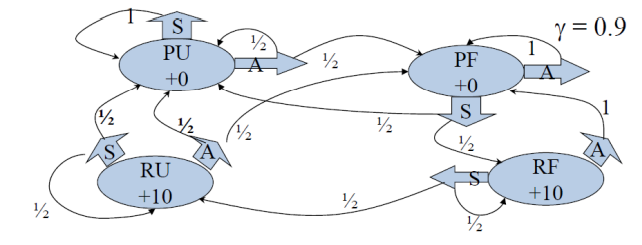

In [116]:
# Displaying the output table

print(tabulate(value_matrix, headers=['V(PU)', 'V(PF)', 'V(RU)', 'V(RF)'], tablefmt='fancy_grid', numalign='center', stralign='center'))

╒═══════════════════╤══════════════╤══════════════╤══════════════╕
│       V(PU)       │    V(PF)     │    V(RU)     │    V(RF)     │
╞═══════════════════╪══════════════╪══════════════╪══════════════╡
│      0 | A/S      │   0 | A/S    │   10 | A/S   │   10 | A/S   │
├───────────────────┼──────────────┼──────────────┼──────────────┤
│    0.00 | save    │ 4.50 | save  │ 14.50 | save │ 19.00 | save │
├───────────────────┼──────────────┼──────────────┼──────────────┤
│ 2.02 | advertise  │ 8.55 | save  │ 16.52 | save │ 25.08 | save │
├───────────────────┼──────────────┼──────────────┼──────────────┤
│ 4.76 | advertise  │ 12.20 | save │ 18.35 | save │ 28.72 | save │
├───────────────────┼──────────────┼──────────────┼──────────────┤
│ 7.63 | advertise  │ 15.07 | save │ 20.40 | save │ 31.18 | save │
├───────────────────┼──────────────┼──────────────┼──────────────┤
│ 10.21 | advertise │ 17.46 | save │ 22.61 | save │ 33.21 | save │
├───────────────────┼──────────────┼──────────────┼───────────